# Computer Vision Assignment-A

In [ ]:
Computer Vision(CG7GV1)
Name: Himanshu Gupta
Student Id: 19300733

In [5]:
#Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D 

# Histogram

1.a) Read a RGB colour image (e.g. png):

In [8]:
img_bgr=cv2.imread('FlowerH.png',1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #cv2 function to convert Image to RGB format
rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('')
plt.imshow(img_rgb)

1.b) Convert the RGB image into Lab colour system and display each component (L,a,b) as an grey level image:

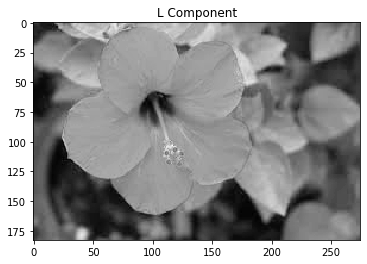

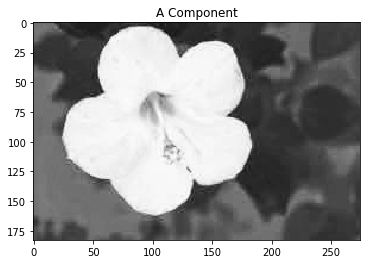

In [32]:
#Convert the RGB image into Lab colour system 
import cv2 
import matplotlib.pyplot as plt
img = cv2.imread('FlowerH.png') 

#Convert to LAB
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel,a_channel,b_channel = cv2.split(lab_image)

rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('L Component')
plt.imshow(l_channel,'gray') #Gray L Component
plt.figure()

plt.title('A Component')
plt.imshow(a_channel,'gray') #Gray A Component
plt.figure()
plt.title('B Component')
plt.imshow(b_channel,'gray') #Gray B Component
plt.figure()
plt.title('LAB Component')
plt.imshow(lab_image,'gray')  #Gray LAB Component

1.c) Compute the spatial derivatives of the luminance component L  in the horizontal and vertical direction using
convolution by the derivatives of Gaussian filter. Display each these derivatives  as grey level images

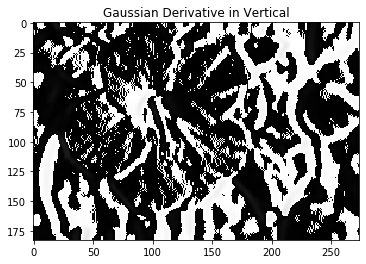

In [11]:
import numpy as np
gaussImage = cv2.GaussianBlur(l_channel,(5,5),5,5)
    
#Derivative along x axis
img_x = np.diff(gaussImage,axis=0)

rcParams['figure.figsize'] = 6,4
plt.figure()
plt.title('Gaussian Derivative in Horizontal')
plt.imshow(img_x,'gray')
   
#Derivative along y axis
img_y = np.diff(gaussImage,axis=1)
plt.figure()
plt.title('Gaussian Derivative in Vertical')
plt.imshow(img_y,'gray')

1.d) Compute a 2D histogram with the chrominance component (a,b)  and display the histogram as a grey image (heat map) and/or as a 3D surface (bar plot) 

In [16]:
import matplotlib.colors as colors
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

hist, xbins, ybins = np.histogram2d(a_channel.ravel(),b_channel.ravel(),bins=100)
rcParams['figure.figsize'] = 11,8
plt.figure()

# Construct arrays for the anchor positions with 16 bars.
xpos, ypos = np.meshgrid(xbins[:-1] + 0.25, ybins[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
x = y = 0.5 * np.ones_like(zpos)
z = hist.ravel()

ax.bar3d(xpos, ypos, zpos, x, y, z, zsort='average')

<Figure size 792x576 with 0 Axes>

1.e)  Using a part of the image to compute a 2D histogram model with the chrominance component (a,b), compute a back projection map with this model histogram in the target image.

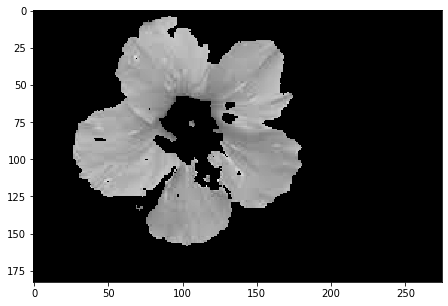

In [17]:
#Back Projection
target = "FlowerHPart.png"
source_img = "FlowerH.png"
sourceRead = cv2.imread(source_img)
source_img = cv2.cvtColor(sourceRead, cv2.COLOR_BGR2RGB)
targeta = cv2.imread(target)
target = cv2.cvtColor(targeta, cv2.COLOR_BGR2LAB)
source_img1 = cv2.cvtColor(sourceRead, cv2.COLOR_BGR2LAB)
hist_target = cv2.calcHist([target], [1, 2], None, [256, 256], [0, 256, 0, 256])
back_proj = cv2.calcBackProject([source_img1],[1,2],hist_target,[0,256,0,256],1)

#Removing Noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
back_proj = cv2.filter2D(back_proj,-1,kernel)

#mark the image using binary threshold
_, back_proj = cv2.threshold(back_proj, 127, 255, cv2.THRESH_BINARY)
back_proj = cv2.merge((back_proj, back_proj, back_proj))
result = cv2.bitwise_and(source_img,back_proj)
#plot_image(result,'Back Projection')
final = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
rcParams['figure.figsize'] = 8,5
plt.imshow(final,cmap='gray')

1.f) Perform histogram equalization using 1D histogram using the luminance L computed in 1.a. Display the resulting image with enhanced contrast.

In [19]:
#Required Libraries
import cv2
import numpy as np
img = cv2.imread('FlowerH.png')

#COLOR_BGR2LAB is a color space conversion method used to convert in LAB componets
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l_channel,a_channel,b_channel = cv2.split(lab_image)

#Equalizing the histogram using the luminance L.
equalized_channels = []
equalized_channels.append(cv2.equalizeHist(l_channel))

equalized_image = cv2.merge(equalized_channels)

#rcparams is being used to Plot the images next to each other.
rcParams['figure.figsize'] = 11 ,8
fig,ax = plt.subplots(1,2)
ax[0].imshow(l_channel,cmap="gray")
ax[0].title.set_text('Actual L Component')
ax[1].imshow(equalized_image,cmap="gray")
ax[1].title.set_text('Equalized L Component')

#Plot histogram
plt.figure()
plt.plot(equalized_image, color = 'g')
plt.hist(equalized_image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc = 'upper right')
plt.show()

1.g) Evaluate the performance of these techniques with histograms (i.e. illustrate when it works, and when it does not work.

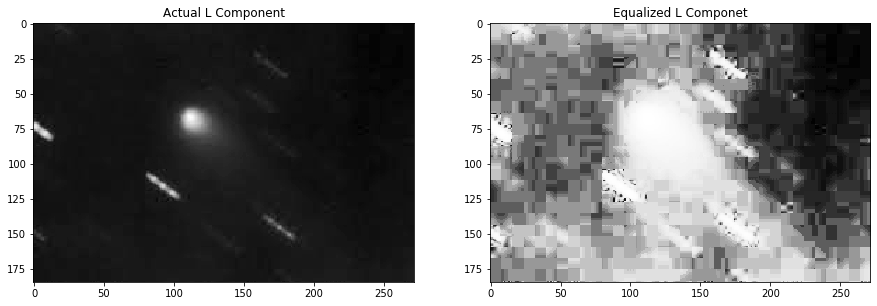

In [21]:
#Equalization Histogram fails:
from matplotlib import rcParams
#Read image
img_bgr=cv2.imread('ImageToEqualize_1.jpg',1)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

#Split RGB image into LAB components
l_component,a_component,b_component = cv2.split(img_rgb)

#Calcuate the histogram
eq_channels = []
eq_channels.append(cv2.equalizeHist(l_component))
eq_image = cv2.merge(eq_channels)

rcParams['figure.figsize'] = (15 ,5)
fig,ax = plt.subplots(1,2)
ax[0].imshow(l_component,cmap="gray")
ax[0].title.set_text('Actual L Component')
ax[1].imshow(eq_image,cmap="gray")
ax[1].title.set_text('Equalized L Componet')

plt.figure()
plt.plot(eq_image, color = 'g')
plt.hist(eq_image.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('CDF','Histogram'), loc = 'upper right')
plt.show()  

From the above equilzation we observe that the histogram works when the colors are distributed in the image, wheres when the image as above with a single object is selected the background color overtakes the object color,hence the histogram fails to equilalize.

In [24]:
imgmatrix.shape

(5949, 784)

# Principal Component Analysis (PCA)

2.a) Compute the mean image and principal components for a set of images (e.g. use the training images of ‘5’ in the mnist dataset). Display the mean image and the first 2 principal components (associated with the highest eigenvalues

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

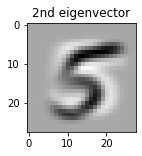

In [49]:
images,labels = fetch_openml('mnist_784', version=1, return_X_y=True)
n_train= 60000 #The size of the training set
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[n_train:]
test_labels = labels[n_train:]

#The below code will filter out the image set 5 as trainging set image
train_imgs = train_images.astype(np.float32)/255
train_lbls = train_labels.astype(np.float32)
test_imgs = test_images.astype(np.float32)/255
test_lbls = test_labels.astype(np.float32)
labels_n = np.where(train_lbls == 5)
imgmatrix = train_imgs[list(labels_n)]

X=imgmatrix
num_data,dim = X.shape

#calculate mean
mean_X = X.mean(axis=0)
X = X-mean_X
#for higher dimension images
if dim>num_data:
    covM = np.dot(X,X.T) #covariance matrix
    eg,EV = np.linalg.eigh(covM) #eigenvalues and eigne vectors
    tmp = np.dot(X.T,EV).T  #vector multiplication to match the dimension
    egV = tmp[::-1] #reverce to get the highest eigen vectors
    egS = np.sqrt(eg)[::-1] #reverse the vector to get highest eigen values
    for i in range(egV.shape[1]):
        egV[:,i] /= egS
else:
    U,egS,egV = np.linalg.svd(X)
    egV = egV[:num_data] ##Generate Eigenvalues,eigenvectors and mean image: egV,egS and mean_X

#Construct the test image for pca
tlab = np.where(test_lbls == 5)
tst_img = test_imgs[list(tlab)]
test_img = tst_img[10]

#Plot mean and first two eigenvectors
plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(mean_X.reshape(28,28))
plt.title("Mean Image")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(egV[0].reshape(28,28))
plt.title("1st eigenvector")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(egV[1].reshape(28,28))
plt.title("2nd eigenvector")
plt.show()

2.b) Compute and display the reconstructions of a test image using the mean image and with p principal components associated with the p highest eigenvalues (e.g. Fig 10.12) with p=10 and p=50

<Figure size 576x360 with 0 Axes>

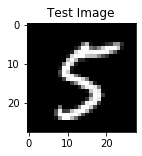

<Figure size 576x360 with 0 Axes>

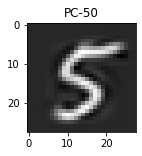

<Figure size 576x360 with 0 Axes>

In [50]:
pca_reconstruct_10 = np.dot(np.dot(test_img - mean_X,egV[:10].T),egV[:10]) + mean_X
pca_reconstruct_50 = np.dot(np.dot(test_img - mean_X,egV[:50].T),egV[:50]) + mean_X
pca_reconstruct_all = np.dot(np.dot(test_img - mean_X,egV[:784].T),egV[:784]) + mean_X

img_dict = {0:('Test Image',test_img),1:('PC-50',pca_reconstruct_50),2:('PC-10',pca_reconstruct_10)}
plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(test_img.reshape(28,28))
plt.title("Test Image")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(pca_reconstruct_50.reshape(28,28))
plt.title("PC-50")
plt.show()

plt.gray()
fig = plt.figure(figsize=(2,2))
plt.imshow(pca_reconstruct_10.reshape(28,28))
plt.title("PC-10")
plt.show()

2.c) Compute and display a DFFS (distance-from feature-space) and SSD (sum-of-square-differences) heat maps for detection using your PCA 
representation of a MNIST number

In [52]:
#Test Image for ssd and dffs

test_img_scale =  []

for i in range(10):
    for j in range(10):
        label_i = np.where(train_lbls == j)
        test_img_scale.append(train_imgs[label_i[0][i]])

temp = np.hstack( (np.asarray([ i.reshape(28,28) for i in test_img_scale ])))

test_img_scale =  []
for i in range(0,temp.shape[1],280):
    test_img_scale.append(np.array(temp[0:28,0+i:280+i]))

test_image = np.vstack(x for x in test_img_scale)

plt.imshow(test_image)
plt.title("Test Image")

target_img = test_image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


In [53]:
#DFFS Heat Map
imgmean = mean_X
pca_reconstruct = pca_reconstruct_all

df_vector = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        #Calcuate dffs distance matrix
        df_vector.append(np.sqrt(np.sum(np.square(np.subtract(np.subtract(target_img[0+i:28+i,j:28+j],imgmean.reshape(28,28)),pca_reconstruct.reshape(28,28)))))) 
#Plot Heat map of ssd
rcParams['figure.figsize'] = (8 ,5)
plt.figure()
plt.title("DFFS Heatmap")
sns.heatmap(np.array(df_vector).reshape(10,10),cmap='gray')

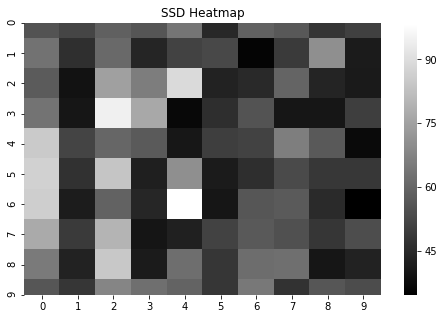

In [54]:
#SSD Heat Map
sd_vector = []
for i in range(0,target_img.shape[0],28):
    for j in range(0,target_img.shape[1],28):
        #Calcuate ssd distance matrix
        sd_vector.append(np.sum(np.square(np.subtract(target_img[i:28+i,j:28+j],imgmean.reshape(28,28)))))
#Plot Heat map of ssd
rcParams['figure.figsize'] = (8 ,5)
plt.figure()
plt.title("SSD Heatmap")
sns.heatmap(np.array(sd_vector).reshape(10,10),cmap='gray')

2.d) Evaluate the performance of SSD and DFFS (i.e. illustrate when it works, and when it does not work).